In [1]:
from sklearn.base import BaseEstimator, RegressorMixin
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error, make_scorer
import pandas as pd
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split

In [2]:
#read train data and validate data
train_data = pd.read_csv("train_data.csv",header=0)
val_data = pd.read_csv("validate_data.csv",header=0)

In [3]:
#<Zihan Dai> (<2020/11>) <ridge_regression> [<.ipynb>]. Machine learning course Assignment2.
class RidgeRegression(BaseEstimator, RegressorMixin):
    """ ridge regression"""

    def __init__(self, l2reg=1):
        if l2reg < 0:
            raise ValueError('Regularization penalty should be at least 0.')
        self.l2reg = l2reg

    def fit(self, X, y=None):
        n, num_ftrs = X.shape
        # convert y to 1-dim array, in case we're given a column vector
        y = y.reshape(-1)
        def ridge_obj(w):
            predictions = np.dot(X,w)
            residual = y - predictions
            empirical_risk = np.sum(residual**2) / n
            l2_norm_squared = np.sum(w**2)
            objective = empirical_risk + self.l2reg * l2_norm_squared
            return objective
        self.ridge_obj_ = ridge_obj

        w_0 = np.zeros(num_ftrs)
        self.w_ = minimize(ridge_obj, w_0).x
        return self

    def predict(self, X, y=None):
        try:
            getattr(self, "w_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")
        return np.dot(X, self.w_)

    def score(self, X, y):
        # Average square error
        try:
            getattr(self, "w_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")
        residuals = self.predict(X) - y
        return np.dot(residuals, residuals)/len(y)


def do_grid_search_ridge(X_train, y_train, X_val, y_val):
    X_train_val = np.vstack((X_train, X_val))
    y_train_val = np.concatenate((y_train, y_val))
    val_fold = [-1]*len(X_train) + [0]*len(X_val) #0 corresponds to validation、
    
    param_grid = [{'l2reg':np.unique(np.concatenate((10.**np.arange(-2.5,-1.5,0.005),)))}]
    
    ridge_regression_estimator = RidgeRegression()
    grid = GridSearchCV(ridge_regression_estimator,
                        param_grid,
                        return_train_score=True,
                        cv = PredefinedSplit(test_fold=val_fold),
                        refit = True,
                        scoring = make_scorer(mean_squared_error,
                              greater_is_better = False))
    grid.fit(X_train_val, y_train_val)
    df = pd.DataFrame(grid.cv_results_)
    df['mean_test_score'] = -df['mean_test_score']
    df['mean_train_score'] = -df['mean_train_score']
    cols_to_keep = ["param_l2reg", "mean_test_score","mean_train_score"]
    df_toshow = df[cols_to_keep].fillna('-')
    df_toshow = df_toshow.sort_values(by=["param_l2reg"])
    return grid, df_toshow

Delete actor_rating

In [4]:
#train data
X_train = train_data[["director_rating", "region_rating", "writer_rating", "date"]].values
y_train = train_data[["movie_rating"]].values

#validation data
X_val = val_data[["director_rating", "region_rating", "writer_rating", "date"]].values
y_val = val_data[["movie_rating"]].values

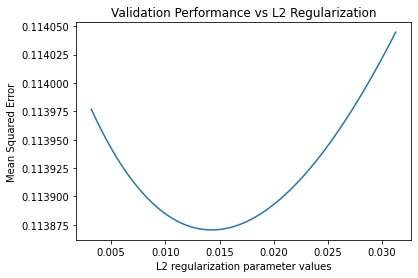

,param_l2reg,mean_test_score,mean_train_score
0,0.003162,0.113977,0.129430
1,0.003199,0.113976,0.129430
2,0.003236,0.113975,0.129431
3,0.003273,0.113975,0.129431
4,0.003311,0.113974,0.129431
...,...,...,...
195,0.029854,0.114019,0.129946
196,0.030200,0.114025,0.129956
197,0.030549,0.114032,0.129966
198,0.030903,0.114038,0.129976


In [5]:
#<Zihan Dai> (<2020/11>) <ridge_regression> [<.ipynb>]. Machine learning course Assignment2.
#Run ridge regression on the provided training dataset.  Choose the λ that minimizes
#the empirical risk (i.e.  the average square loss) on the validation set.
grid,df_toshow=do_grid_search_ridge(X_train, y_train, X_val, y_val)

plt.plot(df_toshow['param_l2reg'],df_toshow['mean_test_score'])
plt.title("Validation Performance vs L2 Regularization")
plt.ylabel('Mean Squared Error')
plt.xlabel('L2 regularization parameter values')
plt.show()

df_toshow

In [6]:
#compute linear regression MSE of validation set
l2reg = 0.014
ridge_regression_estimator = RidgeRegression(l2reg)
ridge_regression_estimator.fit(X_train, y_train)
y_val_pred = ridge_regression_estimator.predict(X_val)
MSE = 0
for i in range(len(y_val_pred)):
    MSE += (y_val_pred[i]-y_val[i][0])**2
MSE /= len(y_val_pred)
print("MSE of ridge regression =",MSE)

MSE of ridge regression = 0.11387052655930663


Delete director_rating

In [7]:
#train data
X_train = train_data[["actor_rating", "region_rating", "writer_rating", "date"]].values
y_train = train_data[["movie_rating"]].values

#validation data
X_val = val_data[["actor_rating", "region_rating", "writer_rating", "date"]].values
y_val = val_data[["movie_rating"]].values

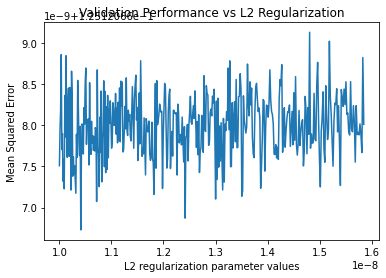

,param_l2reg,mean_test_score,mean_train_score
0,1.000000e-08,0.125121,0.12645
1,1.001152e-08,0.125121,0.12645
2,1.002305e-08,0.125121,0.12645
3,1.003460e-08,0.125121,0.12645
4,1.004616e-08,0.125121,0.12645
...,...,...,...
396,1.577611e-08,0.125121,0.12645
397,1.579429e-08,0.125121,0.12645
398,1.581248e-08,0.125121,0.12645
399,1.583070e-08,0.125121,0.12645


In [8]:
#<Zihan Dai> (<2020/11>) <ridge_regression> [<.ipynb>]. Machine learning course Assignment2.
def do_grid_search_ridge(X_train, y_train, X_val, y_val):
    X_train_val = np.vstack((X_train, X_val))
    y_train_val = np.concatenate((y_train, y_val))
    val_fold = [-1]*len(X_train) + [0]*len(X_val) #0 corresponds to validation、
    
    param_grid = [{'l2reg':np.unique(np.concatenate((10.**np.arange(-8,-7.8,0.0005),)))}]
    
    ridge_regression_estimator = RidgeRegression()
    grid = GridSearchCV(ridge_regression_estimator,
                        param_grid,
                        return_train_score=True,
                        cv = PredefinedSplit(test_fold=val_fold),
                        refit = True,
                        scoring = make_scorer(mean_squared_error,
                              greater_is_better = False))
    grid.fit(X_train_val, y_train_val)
    df = pd.DataFrame(grid.cv_results_)
    df['mean_test_score'] = -df['mean_test_score']
    df['mean_train_score'] = -df['mean_train_score']
    cols_to_keep = ["param_l2reg", "mean_test_score","mean_train_score"]
    df_toshow = df[cols_to_keep].fillna('-')
    df_toshow = df_toshow.sort_values(by=["param_l2reg"])
    return grid, df_toshow


#Run ridge regression on the provided training dataset.  Choose the λ that minimizes
#the empirical risk (i.e.  the average square loss) on the validation set.
grid,df_toshow=do_grid_search_ridge(X_train, y_train, X_val, y_val)

plt.plot(df_toshow['param_l2reg'],df_toshow['mean_test_score'])
plt.title("Validation Performance vs L2 Regularization")
plt.ylabel('Mean Squared Error')
plt.xlabel('L2 regularization parameter values')
plt.show()

df_toshow

In [9]:
#compute linear regression MSE of validation set
l2reg = 1.05e-8
ridge_regression_estimator = RidgeRegression(l2reg)
ridge_regression_estimator.fit(X_train, y_train)
y_val_pred = ridge_regression_estimator.predict(X_val)
MSE = 0
for i in range(len(y_val_pred)):
    MSE += (y_val_pred[i]-y_val[i][0])**2
MSE /= len(y_val_pred)
print("MSE of ridge regression =",MSE)

MSE of ridge regression = 0.12512066783905357


Delete region_rating

In [10]:
#train data
X_train = train_data[["actor_rating", "director_rating", "writer_rating", "date"]].values
y_train = train_data[["movie_rating"]].values

#validation data
X_val = val_data[["actor_rating", "director_rating", "writer_rating", "date"]].values
y_val = val_data[["movie_rating"]].values

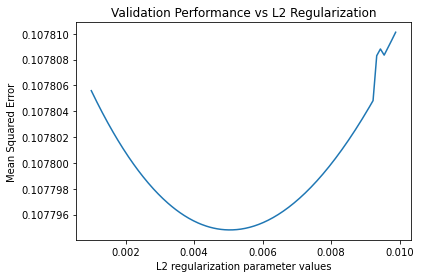

,param_l2reg,mean_test_score,mean_train_score
0,0.001000,0.107806,0.118399
1,0.001012,0.107806,0.118399
2,0.001023,0.107805,0.118399
3,0.001035,0.107805,0.118399
4,0.001047,0.107805,0.118399
...,...,...,...
195,0.009441,0.107809,0.118441
196,0.009550,0.107808,0.118442
197,0.009661,0.107809,0.118443
198,0.009772,0.107810,0.118444


In [11]:
#<Zihan Dai> (<2020/11>) <ridge_regression> [<.ipynb>]. Machine learning course Assignment2.
def do_grid_search_ridge(X_train, y_train, X_val, y_val):
    X_train_val = np.vstack((X_train, X_val))
    y_train_val = np.concatenate((y_train, y_val))
    val_fold = [-1]*len(X_train) + [0]*len(X_val) #0 corresponds to validation、
    
    param_grid = [{'l2reg':np.unique(np.concatenate((10.**np.arange(-3,-2,0.005),)))}]
    
    ridge_regression_estimator = RidgeRegression()
    grid = GridSearchCV(ridge_regression_estimator,
                        param_grid,
                        return_train_score=True,
                        cv = PredefinedSplit(test_fold=val_fold),
                        refit = True,
                        scoring = make_scorer(mean_squared_error,
                              greater_is_better = False))
    grid.fit(X_train_val, y_train_val)
    df = pd.DataFrame(grid.cv_results_)
    df['mean_test_score'] = -df['mean_test_score']
    df['mean_train_score'] = -df['mean_train_score']
    cols_to_keep = ["param_l2reg", "mean_test_score","mean_train_score"]
    df_toshow = df[cols_to_keep].fillna('-')
    df_toshow = df_toshow.sort_values(by=["param_l2reg"])
    return grid, df_toshow

#Run ridge regression on the provided training dataset.  Choose the λ that minimizes
#the empirical risk (i.e.  the average square loss) on the validation set.
grid,df_toshow=do_grid_search_ridge(X_train, y_train, X_val, y_val)

plt.plot(df_toshow['param_l2reg'],df_toshow['mean_test_score'])
plt.title("Validation Performance vs L2 Regularization")
plt.ylabel('Mean Squared Error')
plt.xlabel('L2 regularization parameter values')
plt.show()

df_toshow

In [12]:
#compute linear regression MSE of validation set
l2reg = 0.005
ridge_regression_estimator = RidgeRegression(l2reg)
ridge_regression_estimator.fit(X_train, y_train)
y_val_pred = ridge_regression_estimator.predict(X_val)
MSE = 0
for i in range(len(y_val_pred)):
    MSE += (y_val_pred[i]-y_val[i][0])**2
MSE /= len(y_val_pred)
print("MSE of ridge regression =",MSE)

MSE of ridge regression = 0.10779480861181052


Delete writer_rating

In [13]:
#train data
X_train = train_data[["actor_rating", "director_rating", "region_rating", "date"]].values
y_train = train_data[["movie_rating"]].values

#validation data
X_val = val_data[["actor_rating", "director_rating", "region_rating", "date"]].values
y_val = val_data[["movie_rating"]].values

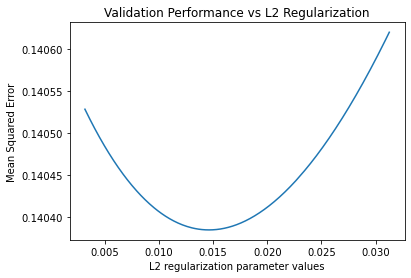

,param_l2reg,mean_test_score,mean_train_score
0,0.003162,0.140529,0.150396
1,0.003199,0.140528,0.150396
2,0.003236,0.140527,0.150396
3,0.003273,0.140526,0.150396
4,0.003311,0.140525,0.150397
...,...,...,...
195,0.029854,0.140584,0.151009
196,0.030200,0.140593,0.151022
197,0.030549,0.140602,0.151035
198,0.030903,0.140611,0.151049


In [14]:
#<Zihan Dai> (<2020/11>) <ridge_regression> [<.ipynb>]. Machine learning course Assignment2.
def do_grid_search_ridge(X_train, y_train, X_val, y_val):
    X_train_val = np.vstack((X_train, X_val))
    y_train_val = np.concatenate((y_train, y_val))
    val_fold = [-1]*len(X_train) + [0]*len(X_val) #0 corresponds to validation、
    
    param_grid = [{'l2reg':np.unique(np.concatenate((10.**np.arange(-2.5,-1.5,0.005),)))}]
    
    ridge_regression_estimator = RidgeRegression()
    grid = GridSearchCV(ridge_regression_estimator,
                        param_grid,
                        return_train_score=True,
                        cv = PredefinedSplit(test_fold=val_fold),
                        refit = True,
                        scoring = make_scorer(mean_squared_error,
                              greater_is_better = False))
    grid.fit(X_train_val, y_train_val)
    df = pd.DataFrame(grid.cv_results_)
    df['mean_test_score'] = -df['mean_test_score']
    df['mean_train_score'] = -df['mean_train_score']
    cols_to_keep = ["param_l2reg", "mean_test_score","mean_train_score"]
    df_toshow = df[cols_to_keep].fillna('-')
    df_toshow = df_toshow.sort_values(by=["param_l2reg"])
    return grid, df_toshow

#Run ridge regression on the provided training dataset.  Choose the λ that minimizes
#the empirical risk (i.e.  the average square loss) on the validation set.
grid,df_toshow=do_grid_search_ridge(X_train, y_train, X_val, y_val)

plt.plot(df_toshow['param_l2reg'],df_toshow['mean_test_score'])
plt.title("Validation Performance vs L2 Regularization")
plt.ylabel('Mean Squared Error')
plt.xlabel('L2 regularization parameter values')
plt.show()

df_toshow

In [15]:
#compute linear regression MSE of validation set
l2reg = 0.015
ridge_regression_estimator = RidgeRegression(l2reg)
ridge_regression_estimator.fit(X_train, y_train)
y_val_pred = ridge_regression_estimator.predict(X_val)
MSE = 0
for i in range(len(y_val_pred)):
    MSE += (y_val_pred[i]-y_val[i][0])**2
MSE /= len(y_val_pred)
print("MSE of ridge regression =",MSE)

MSE of ridge regression = 0.14038443175294085


 Delete date

In [16]:
#train data
X_train = train_data[["actor_rating", "director_rating", "region_rating", "writer_rating"]].values
y_train = train_data[["movie_rating"]].values

#validation data
X_val = val_data[["actor_rating", "director_rating", "region_rating", "writer_rating"]].values
y_val = val_data[["movie_rating"]].values

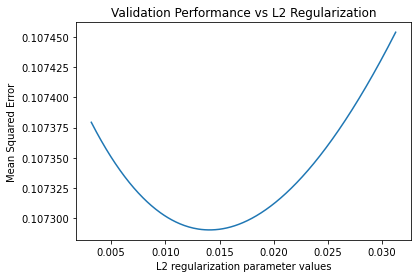

,param_l2reg,mean_test_score,mean_train_score
0,0.003162,0.107379,0.115317
1,0.003199,0.107379,0.115317
2,0.003236,0.107378,0.115317
3,0.003273,0.107377,0.115317
4,0.003311,0.107377,0.115318
...,...,...,...
195,0.029854,0.107430,0.115767
196,0.030200,0.107436,0.115776
197,0.030549,0.107442,0.115785
198,0.030903,0.107448,0.115795


In [17]:
#<Zihan Dai> (<2020/11>) <ridge_regression> [<.ipynb>]. Machine learning course Assignment2.
#Run ridge regression on the provided training dataset.  Choose the λ that minimizes
#the empirical risk (i.e.  the average square loss) on the validation set.
grid,df_toshow=do_grid_search_ridge(X_train, y_train, X_val, y_val)

plt.plot(df_toshow['param_l2reg'],df_toshow['mean_test_score'])
plt.title("Validation Performance vs L2 Regularization")
plt.ylabel('Mean Squared Error')
plt.xlabel('L2 regularization parameter values')
plt.show()

df_toshow

In [18]:
#compute linear regression MSE of validation set
l2reg = 0.014
ridge_regression_estimator = RidgeRegression(l2reg)
ridge_regression_estimator.fit(X_train, y_train)
y_val_pred = ridge_regression_estimator.predict(X_val)
MSE = 0
for i in range(len(y_val_pred)):
    MSE += (y_val_pred[i]-y_val[i][0])**2
MSE /= len(y_val_pred)
print("MSE of ridge regression =",MSE)

MSE of ridge regression = 0.10729024204011083


No more deletion